In [174]:
import pandas as pd
import numpy as np

In [175]:
up1 = pd.read_csv('./trajectory/up1.csv')
up2 = pd.read_csv('./trajectory/up2.csv')
right1 = pd.read_csv('./trajectory/right1.csv')
right2 = pd.read_csv('./trajectory/right2.csv')
down1 = pd.read_csv('./trajectory/down1.csv')
down2 = pd.read_csv('./trajectory/down2.csv')

up1 = np.array(up1)
up2 = np.array(up2)
right1 = np.array(right1)
right2 = np.array(right2)
down1 = np.array(down1)
down2 = np.array(down2)

In [176]:
up1 = up1.reshape(len(up1), 3)
up2 = up2.reshape(len(up2), 3)
right1 = right1.reshape(len(right1), 3)
right2 = right2.reshape(len(right2), 3)
down1 = down1.reshape(len(down1), 3)
down2 = down2.reshape(len(down2), 3)

In [177]:
seq = np.vstack([up1, up2])
seq = np.append(seq, right1, axis=0)
seq = np.append(seq, right2, axis=0)
seq = np.append(seq, down1, axis=0)
seq = np.append(seq, down2, axis=0)
seq.shape

(210, 3)

In [178]:
#seq = seq.reshape(6, 105)
#seq

In [179]:
#df = pd.DataFrame(data=seq)
#df
#df.to_csv('six_trajectory.csv', index=False, header=False)

In [180]:
x_max = max(seq[:,0])
x_min = min(seq[:,0])
y_max = max(seq[:,1])
y_min = min(seq[:,1])
z_max = max(seq[:,2])
z_min = min(seq[:,2])
print(x_min, x_max, y_min, y_max, z_min, z_max)

66.4967 95.4134 -15.1893 281.438 1.4344700000000001 58.4673


In [181]:
seq = seq.reshape(6, 35, 3)
seq

array([[[ 80.081    , 278.725    ,  51.5481   ],
        [ 79.809    , 268.847    ,  53.0291   ],
        [ 79.538    , 257.158    ,  54.7825   ],
        [ 79.2844   , 245.89     ,  55.9122   ],
        [ 78.8713   , 239.182    ,  56.0064   ],
        [ 78.4739   , 232.452    ,  55.5936   ],
        [ 78.259    , 218.466    ,  56.5888   ],
        [ 77.8914   , 208.481    ,  55.9948   ],
        [ 77.5442   , 200.509    ,  54.8337   ],
        [ 77.3829   , 189.691    ,  54.3085   ],
        [ 77.0679   , 180.679    ,  52.9485   ],
        [ 76.7701   , 171.867    ,  51.232    ],
        [ 76.648    , 162.067    ,  49.7529   ],
        [ 76.5374   , 152.249    ,  47.2838   ],
        [ 76.2805   , 144.166    ,  44.7854   ],
        [ 75.8809   , 138.212    ,  40.8821   ],
        [ 75.812    , 128.027    ,  38.242    ],
        [ 75.5966   , 120.273    ,  34.8816   ],
        [ 75.3965   , 112.388    ,  30.8262   ],
        [ 75.2178   , 103.768    ,  27.0571   ],
        [ 75.1927   

In [182]:
tmp = np.zeros((6,35,3))

In [183]:
for i in range(seq.shape[0]):
    for j in range(seq.shape[1]):
        tmp[i,j,0] = (seq[i,j,0]-x_min)/(x_max-x_min)
        tmp[i,j,1] = (seq[i,j,1]-y_min)/(y_max-y_min)
        tmp[i,j,2] = (seq[i,j,2]-z_min)/(z_max-z_min)
        
tmp

array([[[0.46977352, 0.99085384, 0.8786804 ],
        [0.46036719, 0.95755279, 0.9046479 ],
        [0.45099545, 0.91814644, 0.9353916 ],
        [0.44222543, 0.88015938, 0.95519949],
        [0.42793956, 0.85754514, 0.95685117],
        [0.41419664, 0.83485674, 0.94961323],
        [0.40676495, 0.78770666, 0.96706283],
        [0.39405257, 0.75404489, 0.95664778],
        [0.38204567, 0.72716941, 0.93628933],
        [0.37646758, 0.69069941, 0.9270806 ],
        [0.36557422, 0.66031785, 0.90323468],
        [0.35527567, 0.63061053, 0.87313798],
        [0.3510532 , 0.59757244, 0.84720379],
        [0.34722842, 0.56447367, 0.80391119],
        [0.33834428, 0.53722398, 0.76010484],
        [0.32452527, 0.51715166, 0.69166531],
        [0.32214257, 0.48281564, 0.64537443],
        [0.31469359, 0.45667509, 0.58645398],
        [0.30777371, 0.43009291, 0.51534756],
        [0.30159389, 0.40103288, 0.44926107],
        [0.30072588, 0.36927417, 0.3805936 ],
        [0.29531032, 0.34212225, 0

In [184]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, RepeatVector, TimeDistributed

In [185]:
hidden_layer = 256
n_step = 35
features = 3

In [186]:
model = Sequential()
model.add(LSTM(hidden_layer, activation='relu', input_shape=(n_step, features)))
model.add(RepeatVector(n_step))
model.add(LSTM(hidden_layer, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(3)))

In [187]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 256)               266240    
_________________________________________________________________
repeat_vector_4 (RepeatVecto (None, 35, 256)           0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 35, 256)           525312    
_________________________________________________________________
time_distributed_4 (TimeDist (None, 35, 3)             771       
Total params: 792,323
Trainable params: 792,323
Non-trainable params: 0
_________________________________________________________________


In [188]:
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [189]:
model.fit(tmp, tmp, batch_size=2, epochs=600)

Epoch 1/600
6/6 [==============================] - 1s 180ms/step - loss: 0.2726 - acc: 0.6476
Epoch 2/600
6/6 [==============================] - 0s 25ms/step - loss: 0.2242 - acc: 0.6476
Epoch 3/600
6/6 [==============================] - 0s 23ms/step - loss: 0.1696 - acc: 0.6476
Epoch 4/600
6/6 [==============================] - 0s 23ms/step - loss: 0.1198 - acc: 0.6476
Epoch 5/600
6/6 [==============================] - 0s 23ms/step - loss: 0.1279 - acc: 0.6476
Epoch 6/600
6/6 [==============================] - 0s 23ms/step - loss: 0.1224 - acc: 0.6476
Epoch 7/600
6/6 [==============================] - 0s 23ms/step - loss: 0.1043 - acc: 0.6476
Epoch 8/600
6/6 [==============================] - 0s 23ms/step - loss: 0.1026 - acc: 0.6476
Epoch 9/600
6/6 [==============================] - 0s 23ms/step - loss: 0.0888 - acc: 0.6476
Epoch 10/600
6/6 [==============================] - 0s 23ms/step - loss: 0.0828 - acc: 0.6476
Epoch 11/600
6/6 [==============================] - 0s 23ms/step - l

6/6 [==============================] - 0s 24ms/step - loss: 0.0018 - acc: 0.9143
Epoch 175/600
6/6 [==============================] - 0s 23ms/step - loss: 0.0016 - acc: 0.9429
Epoch 176/600
6/6 [==============================] - 0s 22ms/step - loss: 0.0029 - acc: 0.9095
Epoch 177/600
6/6 [==============================] - 0s 24ms/step - loss: 0.0053 - acc: 0.8571
Epoch 178/600
6/6 [==============================] - 0s 23ms/step - loss: 0.0051 - acc: 0.8619
Epoch 179/600
6/6 [==============================] - 0s 23ms/step - loss: 0.0058 - acc: 0.8333
Epoch 180/600
6/6 [==============================] - 0s 23ms/step - loss: 0.0026 - acc: 0.8810
Epoch 181/600
6/6 [==============================] - 0s 23ms/step - loss: 0.0034 - acc: 0.9190
Epoch 182/600
6/6 [==============================] - 0s 23ms/step - loss: 0.0025 - acc: 0.8810
Epoch 183/600
6/6 [==============================] - 0s 22ms/step - loss: 0.0023 - acc: 0.9238
Epoch 184/600
6/6 [==============================] - 0s 23ms/ste

6/6 [==============================] - 0s 22ms/step - loss: 5.2118e-04 - acc: 0.9571
Epoch 343/600
6/6 [==============================] - 0s 22ms/step - loss: 4.8439e-04 - acc: 0.9667
Epoch 344/600
6/6 [==============================] - 0s 22ms/step - loss: 6.0586e-04 - acc: 0.9524
Epoch 345/600
6/6 [==============================] - 0s 23ms/step - loss: 7.6255e-04 - acc: 0.9429
Epoch 346/600
6/6 [==============================] - 0s 23ms/step - loss: 7.6694e-04 - acc: 0.9381
Epoch 347/600
6/6 [==============================] - 0s 22ms/step - loss: 8.2825e-04 - acc: 0.9429
Epoch 348/600
6/6 [==============================] - 0s 23ms/step - loss: 7.8402e-04 - acc: 0.9381
Epoch 349/600
6/6 [==============================] - 0s 23ms/step - loss: 6.7671e-04 - acc: 0.9429
Epoch 350/600
6/6 [==============================] - 0s 23ms/step - loss: 4.9249e-04 - acc: 0.9571
Epoch 351/600
6/6 [==============================] - 0s 23ms/step - loss: 6.6798e-04 - acc: 0.9524
Epoch 352/600
6/6 [=====

6/6 [==============================] - 0s 24ms/step - loss: 9.1408e-04 - acc: 0.9238
Epoch 508/600
6/6 [==============================] - 0s 25ms/step - loss: 6.6739e-04 - acc: 0.9571
Epoch 509/600
6/6 [==============================] - 0s 23ms/step - loss: 6.3797e-04 - acc: 0.9667
Epoch 510/600
6/6 [==============================] - 0s 27ms/step - loss: 4.6854e-04 - acc: 0.9619
Epoch 511/600
6/6 [==============================] - 0s 25ms/step - loss: 5.6949e-04 - acc: 0.9429
Epoch 512/600
6/6 [==============================] - 0s 23ms/step - loss: 0.0013 - acc: 0.9476
Epoch 513/600
6/6 [==============================] - 0s 22ms/step - loss: 0.0012 - acc: 0.9286
Epoch 514/600
6/6 [==============================] - 0s 22ms/step - loss: 0.0010 - acc: 0.9429
Epoch 515/600
6/6 [==============================] - 0s 23ms/step - loss: 0.0011 - acc: 0.9429
Epoch 516/600
6/6 [==============================] - 0s 26ms/step - loss: 0.0010 - acc: 0.9524
Epoch 517/600
6/6 [=========================

6/6 [==============================] - 0s 23ms/step - loss: 1.3407e-04 - acc: 0.9857
Epoch 591/600
6/6 [==============================] - 0s 23ms/step - loss: 1.3694e-04 - acc: 0.9857
Epoch 592/600
6/6 [==============================] - 0s 23ms/step - loss: 1.9916e-04 - acc: 0.9810
Epoch 593/600
6/6 [==============================] - 0s 23ms/step - loss: 1.4829e-04 - acc: 0.9857
Epoch 594/600
6/6 [==============================] - 0s 23ms/step - loss: 1.7293e-04 - acc: 0.9810
Epoch 595/600
6/6 [==============================] - 0s 23ms/step - loss: 1.2773e-04 - acc: 0.9857
Epoch 596/600
6/6 [==============================] - 0s 22ms/step - loss: 1.2128e-04 - acc: 0.9857
Epoch 597/600
6/6 [==============================] - 0s 24ms/step - loss: 1.2655e-04 - acc: 0.9857
Epoch 598/600
6/6 [==============================] - 0s 23ms/step - loss: 1.2720e-04 - acc: 0.9857
Epoch 599/600
6/6 [==============================] - 0s 23ms/step - loss: 1.2235e-04 - acc: 0.9905
Epoch 600/600
6/6 [=====

In [190]:
yhat = model.predict(tmp)

In [191]:
pred = yhat
for i in range(yhat.shape[0]):
    for j in range(yhat.shape[1]):
        pred[i,j,0] = pred[i,j,0]*(x_max-x_min)+x_min
        pred[i,j,1] = pred[i,j,1]*(y_max-y_min)+y_min
        pred[i,j,2] = pred[i,j,2]*(z_max-z_min)+z_min
pred

array([[[ 80.25295   , 283.42538   ,  53.653763  ],
        [ 79.71015   , 267.95395   ,  53.848328  ],
        [ 79.49552   , 261.2069    ,  55.469833  ],
        [ 79.20862   , 250.08543   ,  55.92232   ],
        [ 78.98614   , 239.5053    ,  56.310196  ],
        [ 78.77022   , 228.78734   ,  56.412235  ],
        [ 78.53862   , 218.5458    ,  56.255657  ],
        [ 78.28046   , 208.87169   ,  55.90841   ],
        [ 77.98235   , 199.26889   ,  55.21614   ],
        [ 77.676125  , 189.87704   ,  54.180695  ],
        [ 77.3554    , 180.48642   ,  52.820503  ],
        [ 77.05108   , 171.14507   ,  51.1213    ],
        [ 76.74858   , 161.81693   ,  49.104183  ],
        [ 76.45854   , 152.66457   ,  46.818245  ],
        [ 76.190994  , 143.76625   ,  44.272415  ],
        [ 75.96172   , 135.217     ,  41.5056    ],
        [ 75.799835  , 127.27485   ,  38.571434  ],
        [ 75.66319   , 119.24776   ,  35.378853  ],
        [ 75.51683   , 110.86966   ,  31.87539   ],
        [ 75

In [192]:
error = np.zeros((seq.shape[0], seq.shape[1], seq.shape[2]))
for i in range(error.shape[0]):
    for j in range(error.shape[1]):
        for k in range(error.shape[2]):
            error[i,j,k] = seq[i,j,k]-pred[i,j,k]

np.set_printoptions(suppress=True)
error

array([[[-0.17195258, -4.70038452, -2.10566282],
        [ 0.09884833,  0.89305103, -0.81922764],
        [ 0.04247845, -4.04890918, -0.68733337],
        [ 0.07578184, -4.19543396, -0.01012132],
        [-0.11483739, -0.3232948 , -0.30379592],
        [-0.2963179 ,  3.66466174, -0.81863526],
        [-0.27962   , -0.07980688,  0.3331428 ],
        [-0.38905654, -0.39068884,  0.08639088],
        [-0.43815321,  1.24010962, -0.38244075],
        [-0.29322457, -0.18604468,  0.12780542],
        [-0.28750009,  0.19258032,  0.12799677],
        [-0.2809788 ,  0.72193469,  0.11070026],
        [-0.10058093,  0.25007495,  0.6487168 ],
        [ 0.07885813, -0.41556604,  0.46555507],
        [ 0.08950574,  0.39974939,  0.51298484],
        [-0.08082333,  2.99500476, -0.62349998],
        [ 0.01216479,  0.75215106, -0.32943402],
        [-0.06659275,  1.02524304, -0.49725284],
        [-0.12033044,  1.51834058, -1.0491891 ],
        [-0.12717833,  0.77809369, -1.02138549],
        [-0.00019398

In [193]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

## topspin

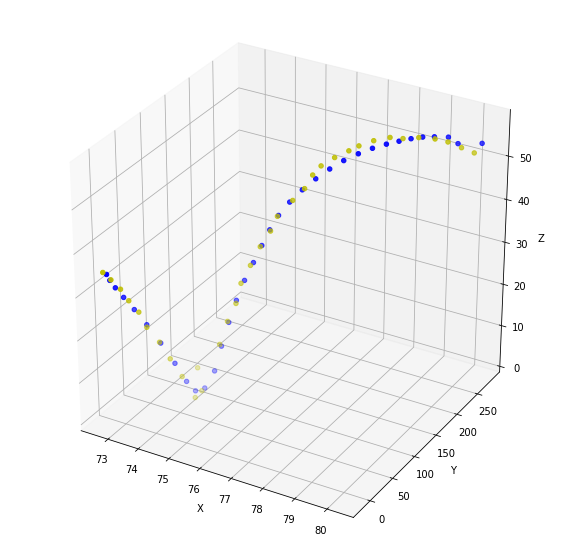

In [194]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1, projection='3d')

act_up1 = seq[0,:,:]
pred_up1 = pred[0,:,:]

act_up1_x = act_up1[:, 0]
act_up1_y = act_up1[:, 1]
act_up1_z = act_up1[:, 2]
ax.scatter(act_up1_x, act_up1_y, act_up1_z, c='y')

pred_up1_x = pred_up1[:,0]
pred_up1_y = pred_up1[:,1]
pred_up1_z = pred_up1[:,2]
ax.scatter(pred_up1_x, pred_up1_y, pred_up1_z, c='b')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

#ax.view_init(90,0)
plt.show()

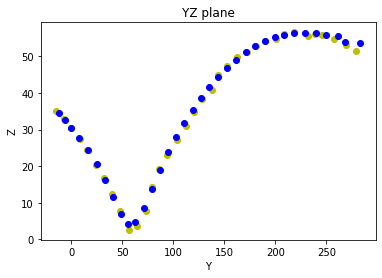

In [195]:
plt.plot(act_up1_y, act_up1_z, 'o', c='y')
plt.plot(pred_up1_y, pred_up1_z, 'o', c='b')

plt.xlabel('Y')
plt.ylabel('Z')
plt.title('YZ plane')
plt.show()

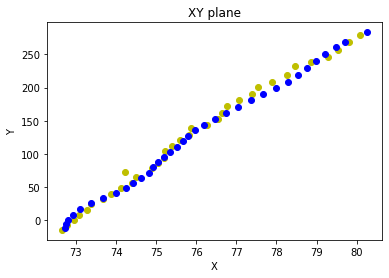

In [196]:
plt.plot(act_up1_x, act_up1_y, 'o', c='y')
plt.plot(pred_up1_x, pred_up1_y, 'o', c='b')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('XY plane')
plt.show()

## rightspin

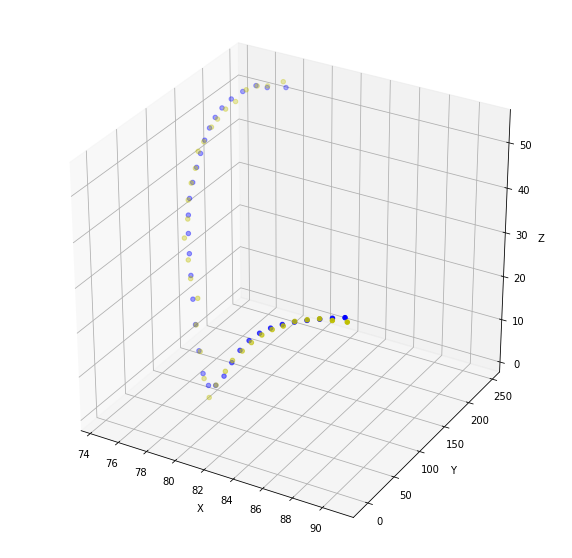

In [197]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1, projection='3d')

act_right1 = seq[2,:,:]
pred_right1 = pred[2,:,:]

act_right1_x = act_right1[:, 0]
act_right1_y = act_right1[:, 1]
act_right1_z = act_right1[:, 2]
ax.scatter(act_right1_x, act_right1_y, act_right1_z, c='y')

pred_right1_x = pred_right1[:,0]
pred_right1_y = pred_right1[:,1]
pred_right1_z = pred_right1[:,2]
ax.scatter(pred_right1_x, pred_right1_y, pred_right1_z, c='b')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

#ax.view_init(0,0)
plt.show()

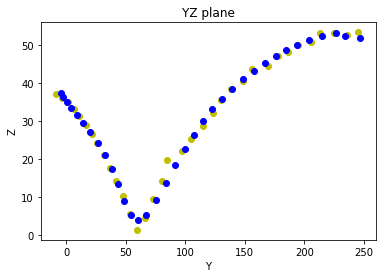

In [198]:
plt.plot(act_right1_y, act_right1_z, 'o', c='y')
plt.plot(pred_right1_y, pred_right1_z, 'o', c='b')

plt.xlabel('Y')
plt.ylabel('Z')
plt.title('YZ plane')
plt.show()

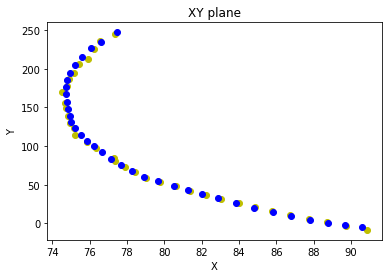

In [199]:
plt.plot(act_right1_x, act_right1_y, 'o', c='y')
plt.plot(pred_right1_x, pred_right1_y, 'o', c='b')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('XY plane')
plt.show()

## backspin

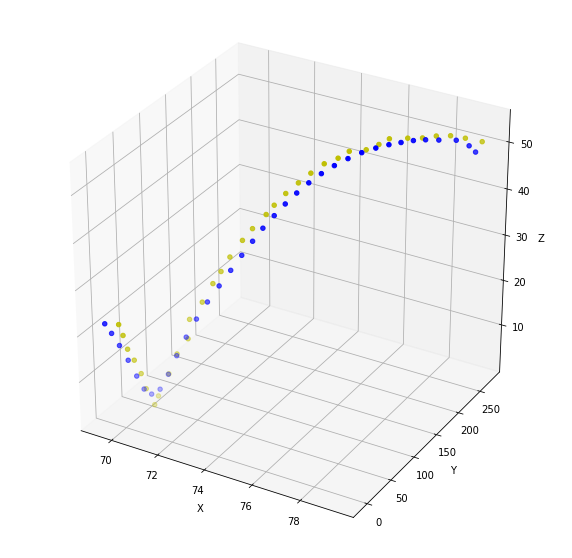

In [200]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1, projection='3d')

act_down1 = seq[4,:,:]
pred_down1 = pred[4,:,:]

act_down1_x = act_down1[:, 0]
act_down1_y = act_down1[:, 1]
act_down1_z = act_down1[:, 2]
ax.scatter(act_down1_x, act_down1_y, act_down1_z, c='y')

pred_down1_x = pred_down1[:,0]
pred_down1_y = pred_down1[:,1]
pred_down1_z = pred_down1[:,2]
ax.scatter(pred_down1_x, pred_down1_y, pred_down1_z, c='b')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

#ax.view_init(0,0)
plt.show()

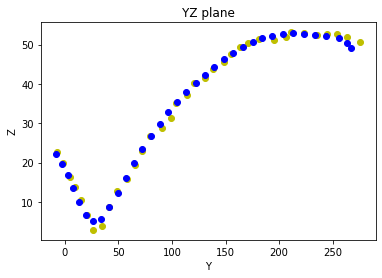

In [201]:
plt.plot(act_down1_y, act_down1_z, 'o', c='y')
plt.plot(pred_down1_y, pred_down1_z, 'o', c='b')

plt.xlabel('Y')
plt.ylabel('Z')
plt.title('YZ plane')
plt.show()

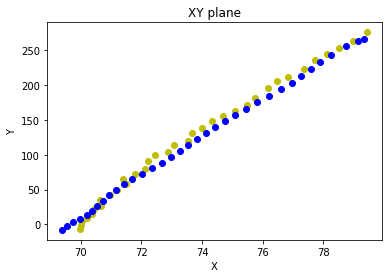

In [202]:
plt.plot(act_down1_x, act_down1_y, 'o', c='y')
plt.plot(pred_down1_x, pred_down1_y, 'o', c='b')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('XY plane')
plt.show()

In [203]:
test_up = pd.read_csv('./trajectory/test_up.csv')
test_right = pd.read_csv('./trajectory/test_right.csv')
test_down = pd.read_csv('./trajectory/test_down.csv')

test_up = np.array(test_up)
test_right = np.array(test_right)
test_down = np.array(test_down)

test_up = test_up.reshape(1, len(test_up), 3)
test_right = test_right.reshape(1, len(test_right), 3)
test_down = test_down.reshape(1, len(test_down), 3)

nor_test_up = np.copy(test_up)
nor_test_right = np.copy(test_right)
nor_test_down = np.copy(test_down)

In [204]:
for j in range(35):
    nor_test_up[:,j,0] = (nor_test_up[:,j,0]-x_min)/(x_max-x_min)
    nor_test_up[:,j,1] = (nor_test_up[:,j,1]-y_min)/(y_max-y_min)
    nor_test_up[:,j,2] = (nor_test_up[:,j,2]-z_min)/(z_max-z_min)
    
    nor_test_right[:,j,0] = (nor_test_right[:,j,0]-x_min)/(x_max-x_min)
    nor_test_right[:,j,1] = (nor_test_right[:,j,1]-y_min)/(y_max-y_min)
    nor_test_right[:,j,2] = (nor_test_right[:,j,2]-z_min)/(z_max-z_min)
        
    nor_test_down[:,j,0] = (nor_test_down[:,j,0]-x_min)/(x_max-x_min)
    nor_test_down[:,j,1] = (nor_test_down[:,j,1]-y_min)/(y_max-y_min)
    nor_test_down[:,j,2] = (nor_test_down[:,j,2]-z_min)/(z_max-z_min)

In [205]:
nor_test_down

array([[[ 0.46195797,  0.98126268,  0.8719299 ],
        [ 0.44535165,  0.93904472,  0.88805921],
        [ 0.42360643,  0.92179412,  0.88137885],
        [ 0.4154658 ,  0.8750587 ,  0.89671212],
        [ 0.40148081,  0.83763463,  0.8992738 ],
        [ 0.38187968,  0.80869259,  0.89595291],
        [ 0.36327451,  0.77425207,  0.8928319 ],
        [ 0.34554427,  0.74632477,  0.87337995],
        [ 0.33506244,  0.70842198,  0.86596141],
        [ 0.31918926,  0.67734932,  0.84847149],
        [ 0.30452645,  0.64258516,  0.83480392],
        [ 0.29032704,  0.61387573,  0.8117593 ],
        [ 0.27786711,  0.57700454,  0.79339093],
        [ 0.26573917,  0.54597234,  0.7664468 ],
        [ 0.24939222,  0.51534805,  0.7298328 ],
        [ 0.23819454,  0.48992557,  0.68983303],
        [ 0.22414729,  0.45810787,  0.65835642],
        [ 0.214945  ,  0.43070311,  0.61714683],
        [ 0.2025819 ,  0.40062159,  0.57562337],
        [ 0.19031909,  0.37416381,  0.52322198],
        [ 0.18034561

In [206]:
nor_pred_up = model.predict(nor_test_up)
nor_pred_right = model.predict(nor_test_right)
nor_pred_down = model.predict(nor_test_down)

In [207]:
pred_test_up = np.copy(nor_pred_up)
pred_test_right = np.copy(nor_pred_right)
pred_test_down = np.copy(nor_pred_down)

for i in range(35):
    pred_test_up[:,i,0] = pred_test_up[:,i,0]*(x_max-x_min)+x_min
    pred_test_up[:,i,1] = pred_test_up[:,i,1]*(y_max-y_min)+y_min
    pred_test_up[:,i,2] = pred_test_up[:,i,2]*(z_max-z_min)+z_min
    
    pred_test_right[:,i,0] = pred_test_right[:,i,0]*(x_max-x_min)+x_min
    pred_test_right[:,i,1] = pred_test_right[:,i,1]*(y_max-y_min)+y_min
    pred_test_right[:,i,2] = pred_test_right[:,i,2]*(z_max-z_min)+z_min
    
    pred_test_down[:,i,0] = pred_test_down[:,i,0]*(x_max-x_min)+x_min
    pred_test_down[:,i,1] = pred_test_down[:,i,1]*(y_max-y_min)+y_min
    pred_test_down[:,i,2] = pred_test_down[:,i,2]*(z_max-z_min)+z_min

In [208]:
test_error_up = np.zeros((test_up.shape[0], test_up.shape[1], test_up.shape[2]))
test_error_right = np.zeros((test_up.shape[0], test_up.shape[1], test_up.shape[2]))
test_error_down = np.zeros((test_up.shape[0], test_up.shape[1], test_up.shape[2]))

for i in range(test_error_up.shape[1]):
    for j in range(test_error_up.shape[2]):
        test_error_up[:,i,j] = test_up[:,i,j]-pred_test_up[:,i,j]
        test_error_right[:,i,j] = test_right[:,i,j]-pred_test_right[:,i,j]
        test_error_down[:,i,j] = test_down[:,i,j]-pred_test_down[:,i,j]

In [209]:
test_error_up

array([[[ 0.72787026, -4.44401929, -1.53111975],
        [ 1.38539487,  2.91288477, -0.05457929],
        [ 1.56524611, -0.41193188, -0.23263842],
        [ 1.81031935, -0.82662695,  0.56045297],
        [ 1.99543899,  1.02922473,  0.90520993],
        [ 2.17690743,  3.26695728,  1.37077538],
        [ 2.33493016,  3.49302429,  1.73516151],
        [ 2.4800491 ,  1.97312415,  2.28845793],
        [ 2.47729536,  5.1214624 ,  1.74066597],
        [ 2.48323939,  6.63991028,  1.67765773],
        [ 2.7954709 ,  3.99061633,  2.61084357],
        [ 2.96364601,  4.65557751,  2.92800479],
        [ 2.84345244,  8.26060889,  2.7776161 ],
        [ 3.00884558,  7.43583154,  2.90930228],
        [ 3.15229851,  6.57190015,  2.9039666 ],
        [ 3.09863455,  6.76016541,  2.79714155],
        [ 3.14236455,  6.99636328,  2.81391217],
        [ 3.16020553,  5.5576073 ,  3.40851807],
        [ 3.01985134,  6.38806921,  2.9034678 ],
        [ 2.84704583,  7.24996619,  2.93016733],
        [ 2.63608761

## Test topspin

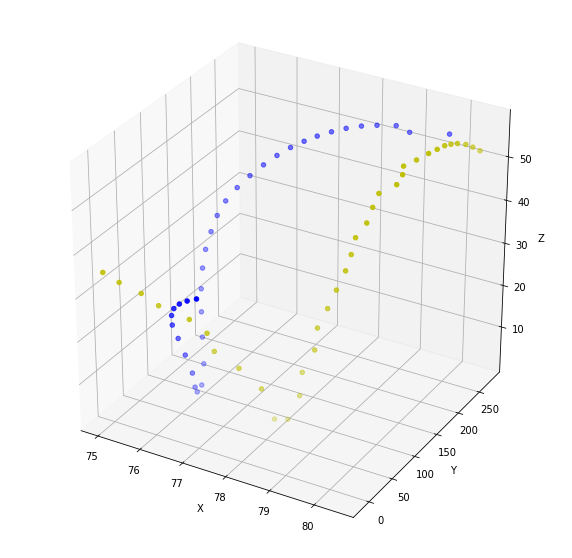

In [210]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1, projection='3d')

act_up1 = test_up[0,:,:]
pred_up1 = pred_test_up[0,:,:]

act_up1_x = act_up1[:, 0]
act_up1_y = act_up1[:, 1]
act_up1_z = act_up1[:, 2]
ax.scatter(act_up1_x, act_up1_y, act_up1_z, c='y')

pred_up1_x = pred_up1[:,0]
pred_up1_y = pred_up1[:,1]
pred_up1_z = pred_up1[:,2]
ax.scatter(pred_up1_x, pred_up1_y, pred_up1_z, c='b')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

#ax.view_init(90,0)
plt.show()

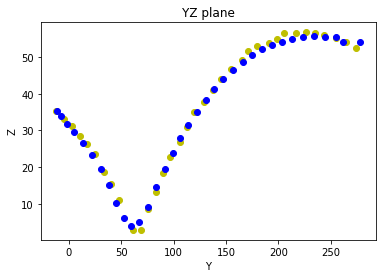

In [211]:
plt.plot(act_up1_y, act_up1_z, 'o', c='y')
plt.plot(pred_up1_y, pred_up1_z, 'o', c='b')

plt.xlabel('Y')
plt.ylabel('Z')
plt.title('YZ plane')
plt.show()

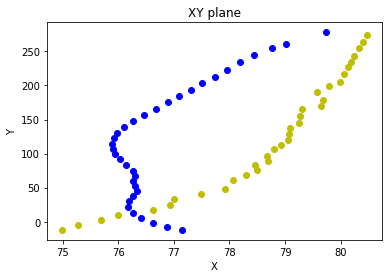

In [212]:
plt.plot(act_up1_x, act_up1_y, 'o', c='y')
plt.plot(pred_up1_x, pred_up1_y, 'o', c='b')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('XY plane')
plt.show()

## rightspin

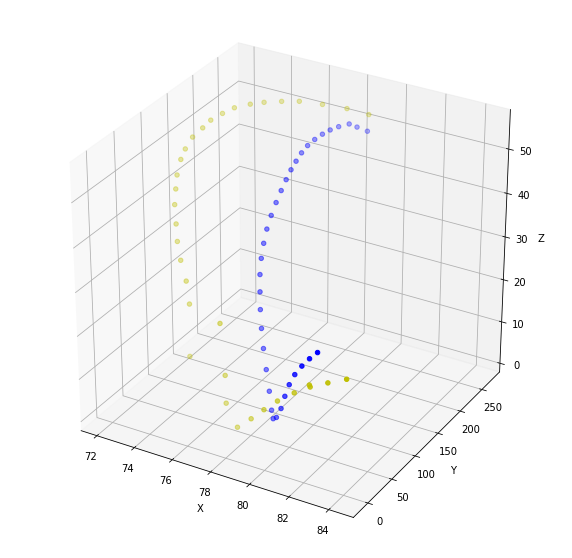

In [213]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1, projection='3d')

act_up1 = test_right[0,:,:]
pred_up1 = pred_test_right[0,:,:]

act_up1_x = act_up1[:, 0]
act_up1_y = act_up1[:, 1]
act_up1_z = act_up1[:, 2]
ax.scatter(act_up1_x, act_up1_y, act_up1_z, c='y')

pred_up1_x = pred_up1[:,0]
pred_up1_y = pred_up1[:,1]
pred_up1_z = pred_up1[:,2]
ax.scatter(pred_up1_x, pred_up1_y, pred_up1_z, c='b')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

#ax.view_init(90,0)
plt.show()

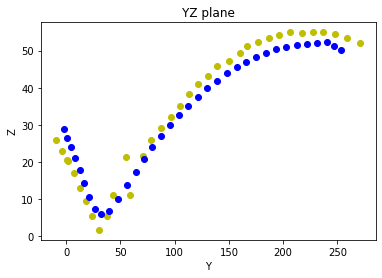

In [214]:
plt.plot(act_up1_y, act_up1_z, 'o', c='y')
plt.plot(pred_up1_y, pred_up1_z, 'o', c='b')

plt.xlabel('Y')
plt.ylabel('Z')
plt.title('YZ plane')
plt.show()

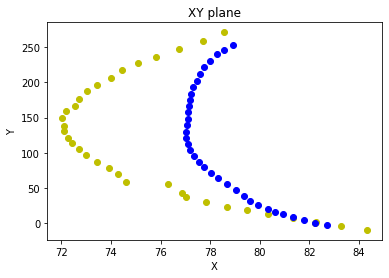

In [215]:
plt.plot(act_up1_x, act_up1_y, 'o', c='y')
plt.plot(pred_up1_x, pred_up1_y, 'o', c='b')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('XY plane')
plt.show()

## backspin

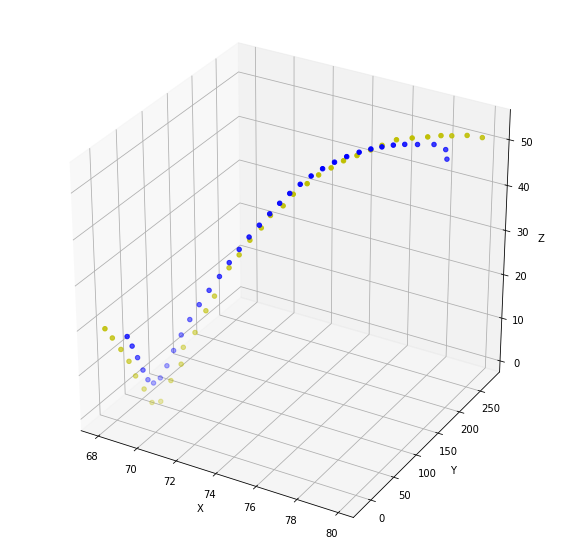

In [216]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1, projection='3d')

act_up1 = test_down[0,:,:]
pred_up1 = pred_test_down[0,:,:]

act_up1_x = act_up1[:, 0]
act_up1_y = act_up1[:, 1]
act_up1_z = act_up1[:, 2]
ax.scatter(act_up1_x, act_up1_y, act_up1_z, c='y')

pred_up1_x = pred_up1[:,0]
pred_up1_y = pred_up1[:,1]
pred_up1_z = pred_up1[:,2]
ax.scatter(pred_up1_x, pred_up1_y, pred_up1_z, c='b')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

#ax.view_init(90,0)
plt.show()

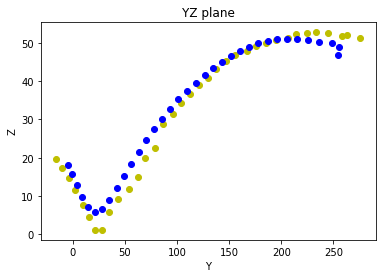

In [217]:
plt.plot(act_up1_y, act_up1_z, 'o', c='y')
plt.plot(pred_up1_y, pred_up1_z, 'o', c='b')

plt.xlabel('Y')
plt.ylabel('Z')
plt.title('YZ plane')
plt.show()

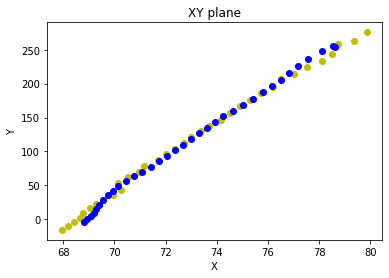

In [218]:
plt.plot(act_up1_x, act_up1_y, 'o', c='y')
plt.plot(pred_up1_x, pred_up1_y, 'o', c='b')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('XY plane')
plt.show()